# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bima Rakajati
- **Email:** bimandugal@gmail.com
- **ID Dicoding:** [bimarakajati](https://www.dicoding.com/users/bimarakajati/academies)

## **Menentukan Pertanyaan Bisnis**

Pada proyek ini, kita akan menganalisis data dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) yang berisi data tentang peminjaman sepeda. Data ini mencakup informasi tentang cuaca, musim, hari libur, dan sebagainya. Dengan data ini, kita akan mencoba menjawab beberapa pertanyaan bisnis, yaitu:

- **Pertanyaan 1:** Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah peminjaman sepeda?
- **Pertanyaan 2:** Bagaimana pengaruh pengguna sepeda berlangganan dan tidak berlangganan terhadap jumlah peminjaman sepeda?
- **Pertanyaan 3:** Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- **Pertanyaan 4:** Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- **Pertanyaan 5:** Bagaimana distribusi jumlah peminjaman sepeda pada tahun 2011 dan 2012?

## **Import Semua Packages/Library yang Digunakan**

In [140]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

Pada proyek ini, kita akan menggunakan beberapa library Python yang umum digunakan untuk analisis data, seperti Pandas, Seaborn, Datetime, dan Matplotlib.

## Data Wrangling

### **Gathering Data**

Data yang digunakan dalam proyek ini adalah [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) yang disediakan oleh UCI Machine Learning Repository. Data ini berisi informasi tentang peminjaman sepeda yang mencakup informasi tentang cuaca, musim, hari libur, dan sebagainya. Data ini terdiri dari dua file, yaitu `day.csv` dan `hour.csv`. Kita akan menggunakan file `hour.csv` karena data ini lebih detail dibandingkan dengan file `day.csv`.

### **Memuat tabel hour**

In [141]:
hour_df = pd.read_csv('data/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### **Penjelasan Variabel pada Tabel hour**

| Variabel | Deskripsi |
| --- | --- |
| instant | ID |
| dteday | Tanggal |
| season | Musim (1: musim dingin, 2: musim semi, 3: musim panas, 4: musim gugur) |
| yr | Tahun (0: 2011, 1: 2012) |
| mnth | Bulan (1 hingga 12) |
| hr | Jam (0 hingga 23) |
| holiday | Hari libur (0: bukan hari libur, 1: hari libur) |
| weekday | Hari dalam seminggu (0 hingga 6) |
| workingday | Hari kerja (0: bukan hari kerja, 1: hari kerja) |
| weathersit | Kondisi cuaca (1: cerah, 2: berawan, 3: salju, 4: hujan) |
| temp | Suhu dalam derajat Celsius |
| atemp | Suhu perasaan dalam derajat Celsius |
| hum | Kelembaban |
| windspeed | Kecepatan angin |
| casual | Peminjaman sepeda oleh pelanggan tanpa keanggotaan |
| registered | Peminjaman sepeda oleh pelanggan dengan keanggotaan |
| cnt | Jumlah total peminjaman sepeda |

**Insight:**
- Tabel `hour` memiliki `17` variabel seperti yang dijelaskan di atas.
- Tabel `hour` memiliki `17.379` baris.

### Assessing Data

### **Menilai Data pada Tabel hour**

In [142]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika kita melihat informasi dari tabel `hour`, kita akan mendapatkan informasi berikut:

- Tidak ada nilai yang hilang pada tabel `hour`, semua variabel memiliki 17379 nilai non-null.
- Variabel `dteday` memiliki tipe data `object` yang seharusnya bertipe `datetime`.

Tapi untuk memastikan apakah ada nilai yang hilang atau tidak, kita akan melakukan pengecekan lebih lanjut.

In [143]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari pengecekan di atas, kita mengetahui bahwa tidak ada nilai yang hilang pada tabel `hour`. Selanjutnya, kita akan mengecek apakah ada duplikat atau tidak.

In [144]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Dari pengecekan di atas, kita mengetahui bahwa tidak ada duplikat pada tabel `hour`. Selanjutnya, kita akan mengecek apakah ada nilai yang tidak masuk akal atau tidak.

In [145]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari pengecekan di atas, kita mengetahui bahwa tidak ada nilai yang tidak masuk akal pada tabel `hour`. Selanjutnya, kita akan menilai data pada tabel `day`.

**Insight:**
- Tidak ada nilai yang hilang pada tabel `hour`.
- Tidak ada duplikat pada tabel `hour`.
- Tidak ada nilai yang tidak masuk akal pada tabel `hour`.

### **Cleaning Data**

### **Membersihkan Data pada Tabel hour**

#### **Mengubah Tipe Data Variabel `dteday`**

Dari hasil pengecekan sebelumnya, kita mengetahui bahwa variabel `dteday` pada tabel `hour` memiliki tipe data `object` yang seharusnya bertipe `datetime`. Maka dari itu, kita akan mengubah tipe data variabel `dteday` menjadi `datetime`.

In [146]:
# Mengecek tipe data sebelum diubah
hour_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype 
--------------  ----- 
17379 non-null  object
dtypes: object(1)
memory usage: 135.9+ KB


In [147]:
#  Mengubah tipe data pada kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [148]:
# Mengecek tipe data setelah diubah
hour_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


Dari hasil di atas, kita telah berhasil mengubah tipe data variabel `dteday` pada tabel `hour` menjadi `datetime`. Selanjutnya, kita akan membersihkan data pada tabel `day`.

**Insight:**
- Variabel `dteday` pada tabel `hour` telah berhasil diubah tipe datanya menjadi `datetime`.

## **Exploratory Data Analysis (EDA)**

### **Pertanyaan 1: Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah peminjaman sepeda?**

In [149]:
hour_df.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [150]:
# Mengelompokkan data berdasarkan workingday
grouped_df = hour_df.groupby('workingday')['cnt'].sum().reset_index()
grouped_df.columns = ['Hari Kerja', 'Total']
grouped_df['Hari Kerja'] = grouped_df['Hari Kerja'].replace({0: 'No', 1: 'Yes'})
grouped_df

,Hari Kerja,Total
0,No,1000269
1,Yes,2292410


Dari hasil di atas, kita dapat melihat bahwa jumlah peminjaman sepeda lebih tinggi pada **hari kerja** dibandingkan dengan **hari libur**. Hal ini menunjukkan bahwa **hari kerja** memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

### **Pertanyaan 2: Bagaimana pengaruh pengguna sepeda berlangganan dan tidak berlangganan terhadap jumlah peminjaman sepeda?**

In [151]:
# Mengelompokkan data berdasarkan pengguna berlangganan dan tidak berlangganan
grouped_user_df = hour_df[['casual', 'registered']].sum().reset_index()
grouped_user_df.columns = ['User Type', 'Count']
grouped_user_df['User Type'] = grouped_user_df['User Type'].replace({'casual': 'Non-Registered', 'registered': 'Registered'})
grouped_user_df

,User Type,Count
0,Non-Registered,620017
1,Registered,2672662


Dari hasil di atas, kita dapat melihat bahwa pengguna sepeda yang **berlangganan** (`Registered`) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan pengguna sepeda yang **tidak berlangganan** (`Non-Registered`). Hal ini menunjukkan bahwa pengguna sepeda yang **berlangganan** memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

### **Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?**

In [152]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_grouped_df = hour_df.groupby('weathersit')['cnt'].sum().reset_index()
weather_grouped_df.columns = ['Weather Situation', 'Total Rides']
weather_grouped_df['Weather Situation'] = weather_grouped_df['Weather Situation'].map({1: 'Clear', 2: 'Cloudy', 3: 'Snow', 4: 'Rain'})
weather_grouped_df

,Weather Situation,Total Rides
0,Clear,2338173
1,Cloudy,795952
2,Snow,158331
3,Rain,223


Dari hasil di atas, kita mendapatkan informasi bahwa kondisi cuaca **cerah** (`Clear`) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca **berawan** (`Cloudy`), **salju** (`Snow`), dan **hujan** (`Rain`). Hal ini menunjukkan bahwa kondisi cuaca **cerah** memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.


### **Pertanyaan 4: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?**

In [153]:
# Mengelompokkan data berdasarkan musim
season_grouped_df = hour_df.groupby('season')['cnt'].sum().reset_index()
season_grouped_df.columns = ['Season', 'Total']
season_grouped_df['Season'] = season_grouped_df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
season_grouped_df

,Season,Total
0,Winter,471348
1,Spring,918589
2,Summer,1061129
3,Fall,841613


Dari hasil di atas, kita dapat melihat bahwa musim **musim panas** (`Summer`) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan **musim semi** (`Spring`), **musim gugur** (`Fall`), dan **musim dingin** (`Winter`).

### **Pertanyaan 5: Bagaimana distribusi jumlah peminjaman sepeda pada tahun 2011 dan 2012?**

In [154]:
# Mengelompokkan data berdasarkan tahun
year_grouped_df = hour_df.groupby('yr')['cnt'].sum().reset_index()
year_grouped_df.columns = ['Year', 'Total']
year_grouped_df['Year'] = year_grouped_df['Year'].map({0: 2011, 1: 2012})
year_grouped_df

,Year,Total
0,2011,1243103
1,2012,2049576


Dari hasil di atas, kita dapat melihat bahwa jumlah peminjaman sepeda pada tahun **2012** lebih tinggi dibandingkan dengan tahun **2011**. Hal ini menunjukkan bahwa jumlah peminjaman sepeda mengalami peningkatan dari tahun 2011 ke tahun 2012.

**Insight:**
- Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Pengguna sepeda yang berlangganan memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan pengguna sepeda yang tidak berlangganan.
- Kondisi cuaca cerah memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca berawan, salju, dan hujan.
- Musim panas memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan musim semi, musim gugur, dan musim dingin.
- Jumlah peminjaman sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah peminjaman sepeda?**

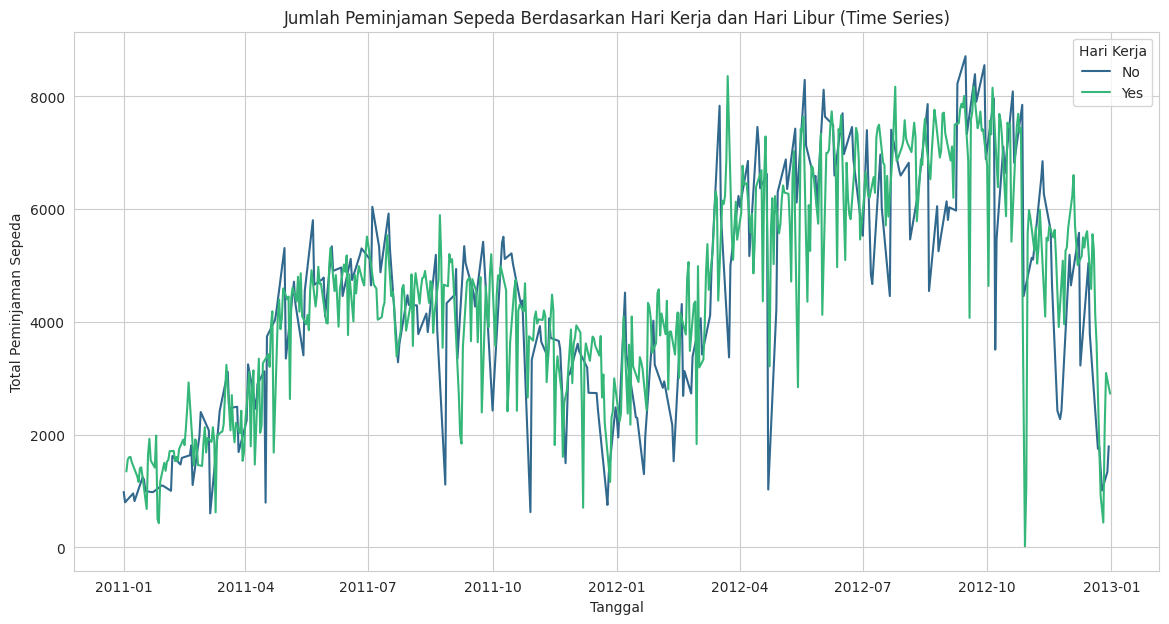

In [155]:
# Mengelompokkan data berdasarkan tanggal dan hari kerja
time_series_df = hour_df.groupby(['dteday', 'workingday'])['cnt'].sum().reset_index()
time_series_df['workingday'] = time_series_df['workingday'].replace({0: 'No', 1: 'Yes'})

# Membuat visualisasi time series
plt.figure(figsize=(14, 7))
sns.lineplot(x='dteday', y='cnt', hue='workingday', data=time_series_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja dan Hari Libur (Time Series)')
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman Sepeda')
plt.legend(title='Hari Kerja')
plt.show()

/tmp/ipykernel_31751/1880001909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hari Kerja', y='Total', data=grouped_df, palette='viridis')


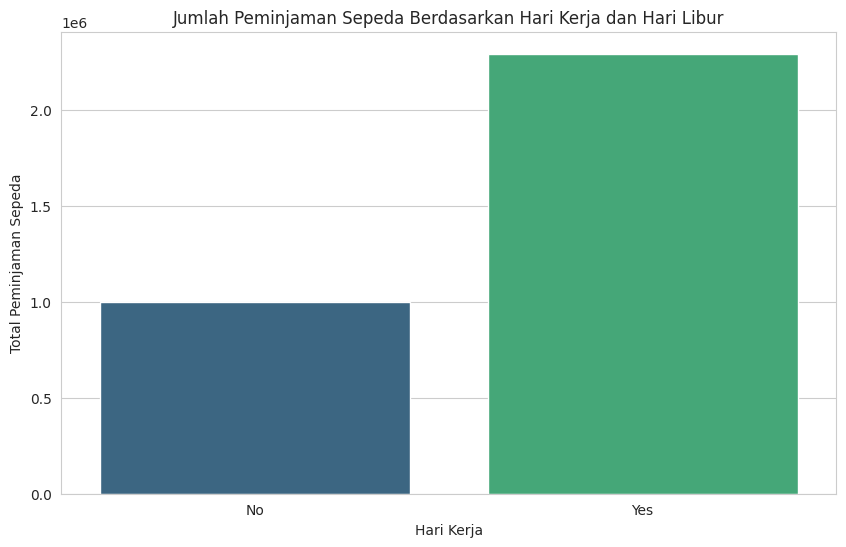

In [156]:
# Membuat visualisasi jumlah peminjaman sepeda berdasarkan hari kerja dan hari libur
plt.figure(figsize=(10, 6))
sns.barplot(x='Hari Kerja', y='Total', data=grouped_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja')
plt.ylabel('Total Peminjaman Sepeda')
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini menunjukkan bahwa hari kerja memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

### **Pertanyaan 2: Bagaimana pengaruh pengguna sepeda berlangganan dan tidak berlangganan terhadap jumlah peminjaman sepeda?**

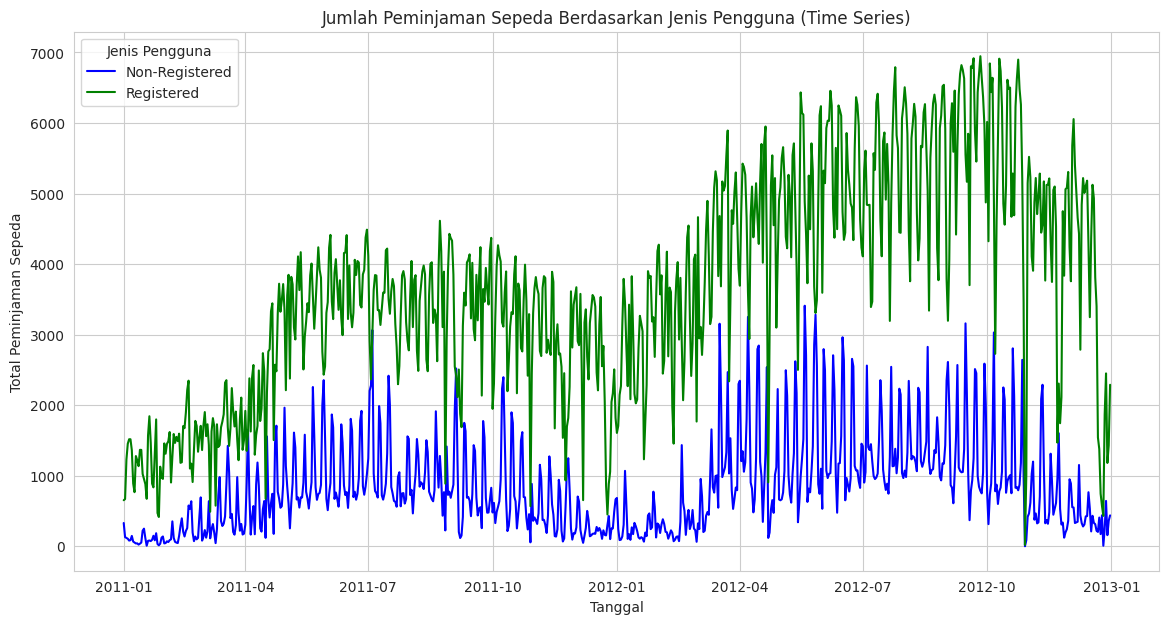

In [157]:
# Mengelompokkan data berdasarkan tanggal dan jenis pengguna
time_series_user_df = hour_df.groupby(['dteday'])[['casual', 'registered']].sum().reset_index()

# Membuat visualisasi time series
plt.figure(figsize=(14, 7))
sns.lineplot(x='dteday', y='casual', data=time_series_user_df, label='Non-Registered', color='blue')
sns.lineplot(x='dteday', y='registered', data=time_series_user_df, label='Registered', color='green')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jenis Pengguna (Time Series)')
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman Sepeda')
plt.legend(title='Jenis Pengguna')
plt.show()

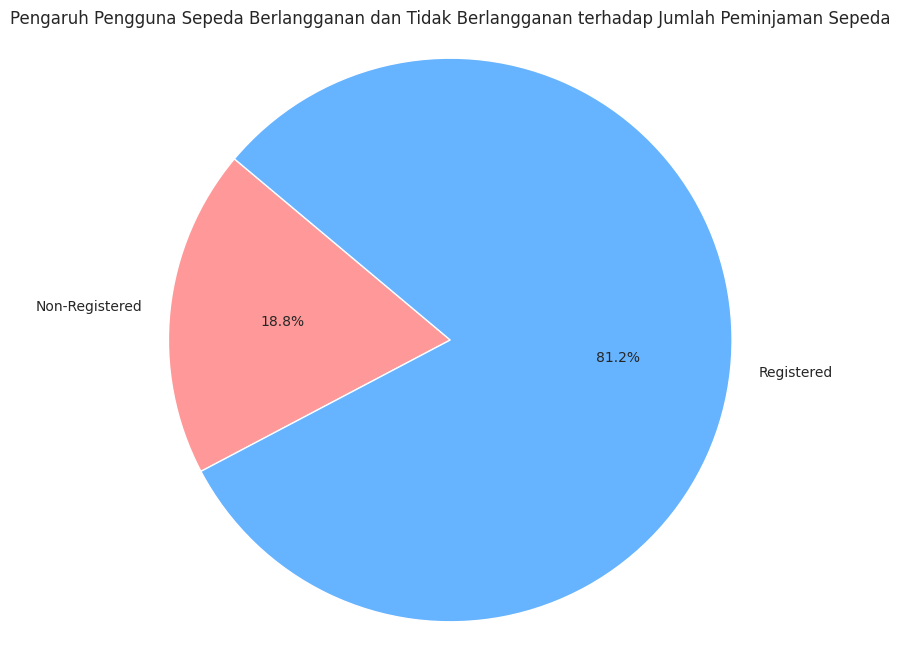

In [158]:
# Membuat visualisasi pie chart untuk pengguna sepeda berlangganan dan tidak berlangganan
plt.figure(figsize=(8, 8))
plt.pie(grouped_user_df['Count'], labels=grouped_user_df['User Type'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Pengaruh Pengguna Sepeda Berlangganan dan Tidak Berlangganan terhadap Jumlah Peminjaman Sepeda')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa pengguna sepeda yang berlangganan (`Registered`) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan pengguna sepeda yang tidak berlangganan (`Non-Registered`). Hal ini menunjukkan bahwa pengguna sepeda yang berlangganan memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

### **Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?**

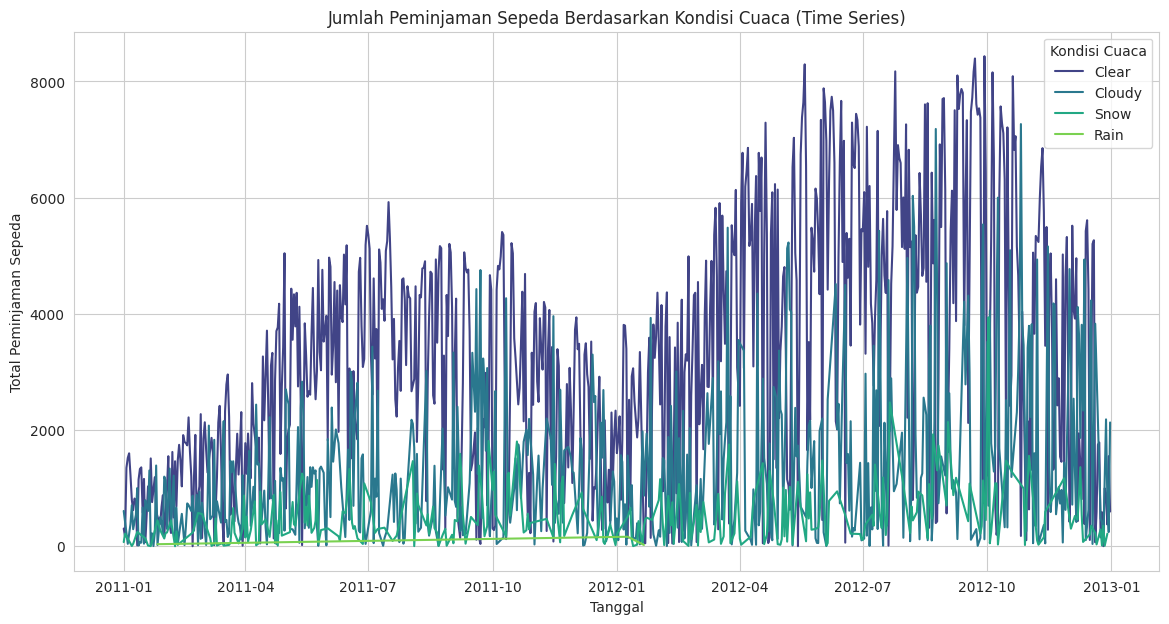

In [159]:
# Mengelompokkan data berdasarkan tanggal dan kondisi cuaca
time_series_weather_df = hour_df.groupby(['dteday', 'weathersit'])['cnt'].sum().reset_index()
time_series_weather_df['weathersit'] = time_series_weather_df['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Snow', 4: 'Rain'})

# Membuat visualisasi time series
plt.figure(figsize=(14, 7))
sns.lineplot(x='dteday', y='cnt', hue='weathersit', data=time_series_weather_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca (Time Series)')
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.show()

/tmp/ipykernel_31751/1007418093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather Situation', y='Total Rides', data=weather_grouped_df, palette='viridis')


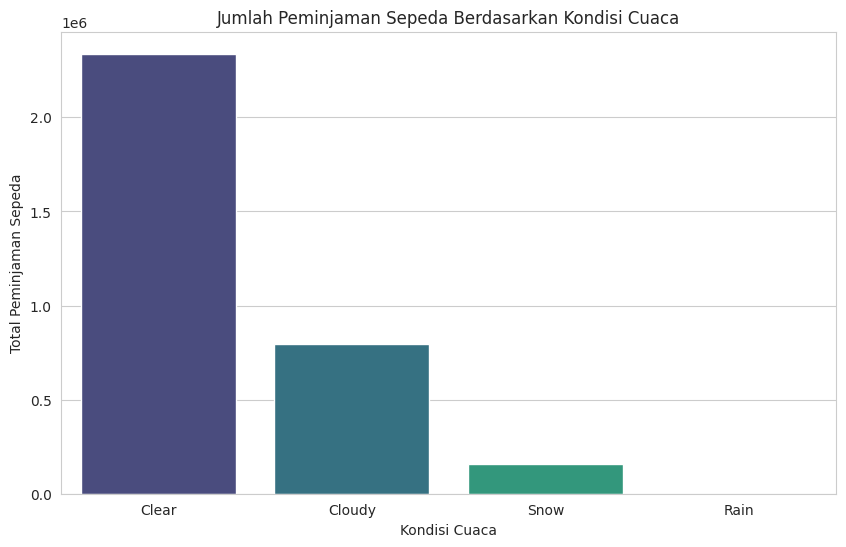

In [160]:
# Membuat visualisasi jumlah peminjaman sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Situation', y='Total Rides', data=weather_grouped_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Peminjaman Sepeda')
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa kondisi cuaca cerah (`Clear`) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca berawan (`Cloudy`), salju (`Snow`), dan hujan (`Rain`). Hal ini menunjukkan bahwa kondisi cuaca cerah memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

### **Pertanyaan 4: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?**

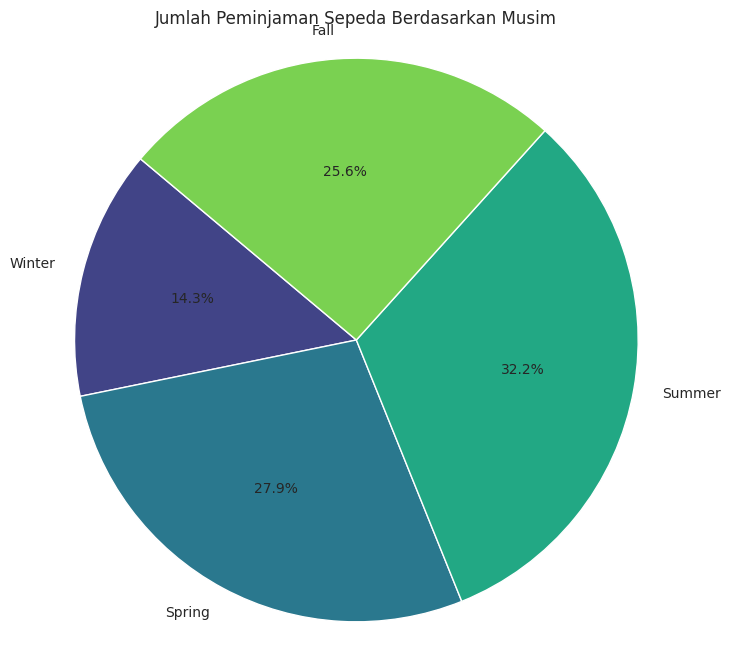

In [161]:
# Mengelompokkan data berdasarkan musim
season_grouped_df = hour_df.groupby('season')['cnt'].sum().reset_index()
season_grouped_df.columns = ['Season', 'Total']
season_grouped_df['Season'] = season_grouped_df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Membuat visualisasi pie chart untuk jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 8))
plt.pie(season_grouped_df['Total'], labels=season_grouped_df['Season'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 4))
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa musim panas (`Summer`) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan musim semi (`Spring`), musim gugur (`Fall`), dan musim dingin (`Winter`).

### **Pertanyaan 5: Bagaimana distribusi jumlah peminjaman sepeda pada tahun 2011 dan 2012?**

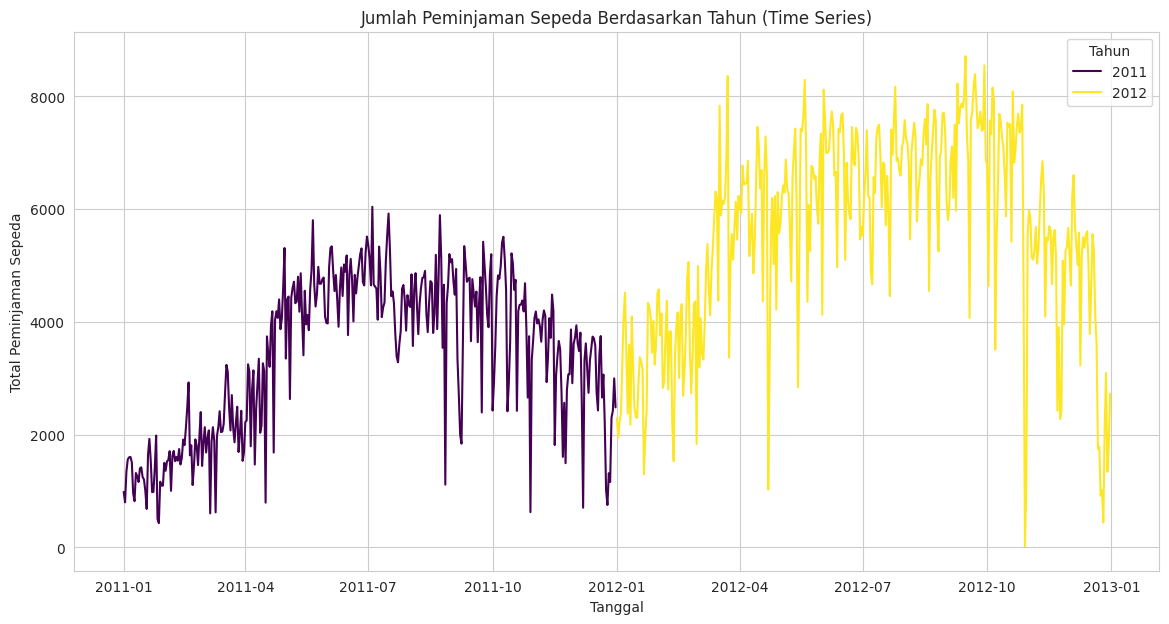

In [162]:
# Mengelompokkan data berdasarkan tanggal dan tahun
time_series_year_df = hour_df.groupby(['dteday', 'yr'])['cnt'].sum().reset_index()
time_series_year_df['yr'] = time_series_year_df['yr'].map({0: 2011, 1: 2012})

# Membuat visualisasi time series
plt.figure(figsize=(14, 7))
sns.lineplot(x='dteday', y='cnt', hue='yr', data=time_series_year_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Tahun (Time Series)')
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman Sepeda')
plt.legend(title='Tahun')
plt.show()

/tmp/ipykernel_31751/901253603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total', data=year_grouped_df, palette='viridis')


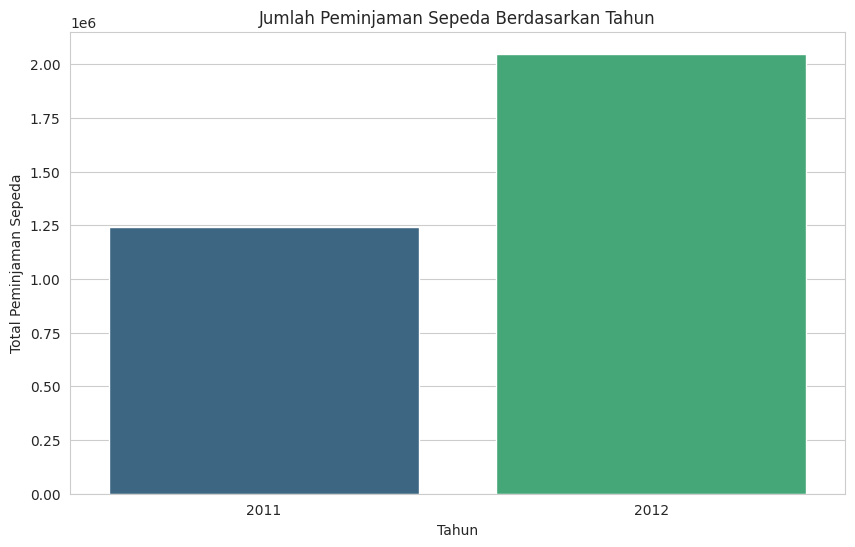

In [163]:
# Membuat visualisasi jumlah peminjaman sepeda berdasarkan tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total', data=year_grouped_df, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjaman Sepeda')
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah peminjaman sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011. Hal ini menunjukkan bahwa jumlah peminjaman sepeda mengalami peningkatan dari tahun 2011 ke tahun 2012.

**Insight:**
- Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Pengguna sepeda yang berlangganan memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan pengguna sepeda yang tidak berlangganan.
- Kondisi cuaca cerah memiliki jumlah peminjaman sepeda yang
- Musim panas memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan musim semi, musim gugur, dan musim dingin.
- Jumlah peminjaman sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011.

## **Analisis Lanjutan (RFM Analysis)**

RFM Analysis adalah metode analisis yang digunakan untuk mengelompokkan pelanggan berdasarkan tiga faktor, yaitu:
- **Recency (R):** Seberapa baru pelanggan melakukan pembelian.
- **Frequency (F):** Seberapa sering pelanggan melakukan pembelian.
- **Monetary (M):** Seberapa besar total pembelian yang dilakukan oleh pelanggan.

Berdasarkan data yang kita miliki, kita akan melakukan RFM Analysis untuk mengelompokkan pelanggan berdasarkan tiga faktor di atas.

In [164]:
# Menghitung Recency, Frequency, dan Monetary
snapshot_date = hour_df['dteday'].max() + dt.timedelta(days=1)
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,
    'instant': 'count',
    'cnt': 'sum'
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Menampilkan hasil analisis RFM
rfm_df

,registered,Recency,Frequency,Monetary
0,0,39,24,35
1,1,1,201,294
2,2,2,245,648
3,3,1,294,1154
4,4,4,307,1602
...,...,...,...,...
771,860,98,1,967
772,871,70,1,938
773,876,69,2,1916
774,885,103,1,976


In [165]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   registered  776 non-null    int64
 1   Recency     776 non-null    int64
 2   Frequency   776 non-null    int64
 3   Monetary    776 non-null    int64
dtypes: int64(4)
memory usage: 24.4 KB


### **Menghitung RFM Score**

Dari hasil di atas, kita telah berhasil menghitung RFM Score untuk setiap pelanggan berdasarkan variabel `Recency`, `Frequency`, dan `Monetary`. Selanjutnya, kita akan mengelompokkan pelanggan berdasarkan RFM Score yang telah dihitung.

In [166]:
# Menentukan skor untuk setiap metrik RFM
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Menggabungkan skor RFM menjadi satu skor RFM
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Menampilkan hasil RFM Analysis
rfm_df.head()

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0,39,24,35,3,4,1,341
1,1,1,201,294,5,5,1,551
2,2,2,245,648,5,5,1,551
3,3,1,294,1154,5,5,1,551
4,4,4,307,1602,5,5,2,552


Berikut adalah deskripsi dari setiap kolom dalam tabel `rfm_df`:

| Kolom       | Deskripsi                                                                 |
|-------------|---------------------------------------------------------------------------|
| registered  | ID pelanggan yang terdaftar                                               |
| Recency     | Jumlah hari sejak pembelian terakhir oleh pelanggan                       |
| Frequency   | Jumlah total transaksi yang dilakukan oleh pelanggan                      |
| Monetary    | Jumlah total nilai pembelian yang dilakukan oleh pelanggan                |
| R_Score     | Skor Recency yang diberikan berdasarkan kuartil (1-5)                     |
| F_Score     | Skor Frequency yang diberikan berdasarkan kuartil (1-5)                   |
| M_Score     | Skor Monetary yang diberikan berdasarkan kuartil (1-5)                    |
| RFM_Score   | Kombinasi dari R_Score, F_Score, dan M_Score yang membentuk skor RFM      |

**Insight:**
- Tabel ini digunakan untuk mengelompokkan pelanggan berdasarkan analisis RFM.
- Skor RFM membantu dalam segmentasi pelanggan untuk strategi pemasaran yang lebih efektif.

### **Segmentasi Pelanggan Berdasarkan RFM Score**



In [167]:
# Define RFM segments
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# Menggabungkan seg_map dengan RFM_Score
rfm_df['Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)

# Menampilkan hasil RFM Analysis
rfm_df.head()

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,0,39,24,35,3,4,1,341,Loyal Customers
1,1,1,201,294,5,5,1,551,Champions
2,2,2,245,648,5,5,1,551,Champions
3,3,1,294,1154,5,5,1,551,Champions
4,4,4,307,1602,5,5,2,552,Champions


In [168]:
# Group by 'Segment'
rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
                       mean      mean     mean count
Segment                                             
About to Sleep         51.0       3.1   1971.3    47
At Risk               111.7      11.9   4654.6    71
Champions               5.7      65.0   5713.9   153
Hibernating           151.9       2.3   1584.3   236
Loyal Customers        29.9      34.4   7816.1   137
Need Attention         47.5      10.5   4799.6    50
New Customers          12.5       1.5    877.0     2
Potential Loyalists    20.3       8.7   4104.3    73
Promising              23.6       1.9   1326.9     7

Dari hasil di atas, kita telah berhasil mengelompokkan pelanggan berdasarkan RFM Score yang telah dihitung sebelumnya. Berikut adalah deskripsi dari setiap segmentasi pelanggan:

- **Hibernating:** Pelanggan yang tidak aktif dalam melakukan pembelian.
- **At Risk:** Pelanggan yang memiliki potensi untuk meninggalkan bisnis.
- **Can't Lose:** Pelanggan yang memiliki nilai pembelian tinggi dan sering melakukan pembelian.
- **About to Sleep:** Pelanggan yang memiliki nilai pembelian tinggi tetapi jarang melakukan pembelian.
- **Need Attention:** Pelanggan yang sering melakukan pembelian tetapi memiliki nilai pembelian rendah.
- **Loyal Customers:** Pelanggan yang memiliki nilai pembelian tinggi dan sering melakukan pembelian.
- **Promising:** Pelanggan yang memiliki potensi untuk menjadi pelanggan loyal.
- **New Customers:** Pelanggan baru yang perlu mendapatkan perhatian lebih.
- **Potential Loyalists:** Pelanggan yang memiliki potensi untuk menjadi pelanggan loyal.
- **Champions:** Pelanggan yang memiliki nilai pembelian tinggi dan sering melakukan pembelian.


### **Visualisasi Segmentasi Pelanggan Berdasarkan RFM Score**

/tmp/ipykernel_31751/2430849777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm_df, palette='viridis', order=rfm_df['Segment'].value_counts().index)


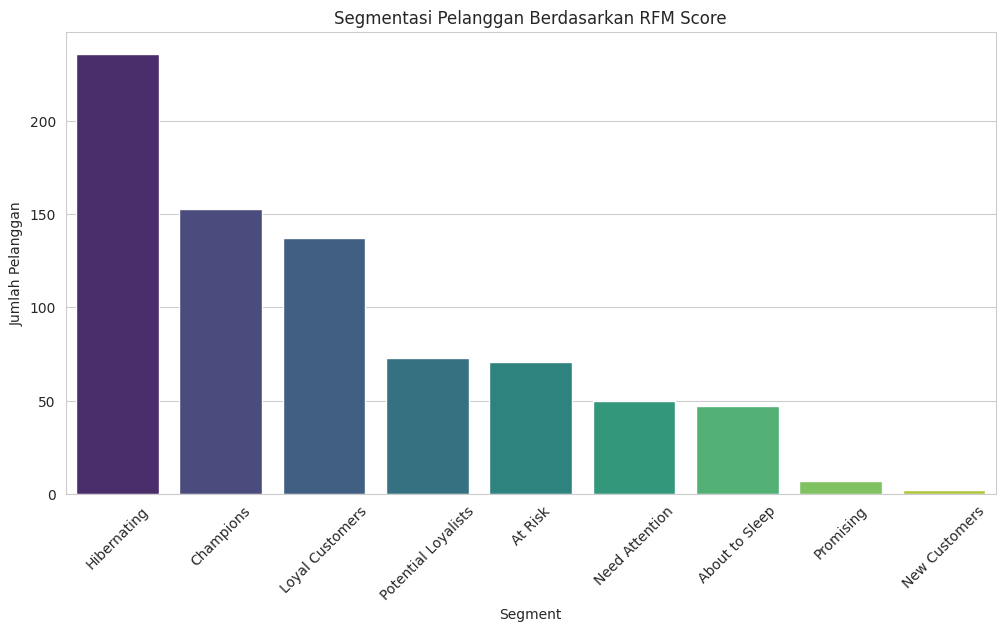

In [169]:
# Visualisasi Segmentasi Pelanggan Berdasarkan RFM Score
plt.figure(figsize=(12, 6))
sns.countplot(x='Segment', data=rfm_df, palette='viridis', order=rfm_df['Segment'].value_counts().index)
plt.title('Segmentasi Pelanggan Berdasarkan RFM Score')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat segmentasi pelanggan berdasarkan RFM Score yang telah dihitung sebelumnya. Pelanggan yang termasuk dalam segmentasi **Hibernating** memiliki jumlah peminjaman sepeda yang tertinggi, diikuti oleh **Champions**, dan **Loyal Customers**. Pelanggan yang termasuk dalam segmentasi **Potential Loyalists**, **At Risk**, **Need Attention**, **About to Sleep**, **Promising**, dan **New Customers** memiliki jumlah peminjaman sepeda yang lebih rendah dibandingkan dengan **Hibernating**, **Champions**, dan **Loyal Customers**. Maka dari itu, kita harus memberikan perhatian lebih kepada pelanggan yang termasuk dalam segmentasi **Potential Loyalists**, **At Risk**, **Need Attention**, **About to Sleep**, **Promising**, dan **New Customers**.

## **Conclusion**

- **Conclution pertanyaan 1:**

    Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.

- **Conclution pertanyaan 2:**

    Pengguna sepeda yang berlangganan memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan pengguna sepeda yang tidak berlangganan.

- **Conclution pertanyaan 3:**

    Kondisi cuaca cerah memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca berawan, salju, dan hujan.

- **Conclution pertanyaan 4:**

    Musim panas memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan musim semi, musim gugur, dan musim dingin.

- **Conclution pertanyaan 5:**

    Jumlah peminjaman sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011.

- **Conclution RFM Analysis:**
    
    Pelanggan yang termasuk dalam segmentasi **Hibernating** memiliki jumlah peminjaman sepeda yang tertinggi, diikuti oleh **Champions**, dan **Loyal Customers**. Pelanggan yang termasuk dalam segmentasi **Potential Loyalists**, **At Risk**, **Need Attention**, **About to Sleep**, **Promising**, dan **New Customers** memiliki jumlah peminjaman sepeda yang lebih rendah dibandingkan dengan **Hibernating**, **Champions**, dan **Loyal Customers**. Maka dari itu, kita harus memberikan perhatian lebih kepada pelanggan yang termasuk dalam segmentasi **Potential Loyalists**, **At Risk**, **Need Attention**, **About to Sleep**, **Promising**, dan **New Customers**.